In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
filename = 'Translink_data/Instappers_per_uur_export_2023.csv'

df = pd.read_csv(filename,delimiter=';') # ,header = None

print(df.head())


      Datum  Uur  Aantal_check_ins
0  1-1-2023    0               1.7
1  1-1-2023    1               6.0
2  1-1-2023    2               6.5
3  1-1-2023    3               6.2
4  1-1-2023    4               6.0


In [9]:
# Step 1: combine into one string, making sure hour has two digits
df["datetime"] = pd.to_datetime(
    df["Datum"] + " " + df["Uur"].astype(str).str.zfill(2) + ":00",
    format="%d-%m-%Y %H:%M"
)

# # Step 2: (optional) make it your index
# df = df.set_index("datetime")

print(df.head())

      Datum  Uur  Aantal_check_ins            datetime
0  1-1-2023    0               1.7 2023-01-01 00:00:00
1  1-1-2023    1               6.0 2023-01-01 01:00:00
2  1-1-2023    2               6.5 2023-01-01 02:00:00
3  1-1-2023    3               6.2 2023-01-01 03:00:00
4  1-1-2023    4               6.0 2023-01-01 04:00:00


In [12]:
november_df = df[
    (df["datetime"].dt.year == 2023) &
    (df["datetime"].dt.month == 11)
]

In [20]:
# group by date only (ignoring hour)
daily = (
    november_df.groupby(november_df["datetime"].dt.date)["Aantal_check_ins"]
    .sum()
)


x = daily.index
y = daily.values

print(daily.index)

Index([2023-11-01, 2023-11-02, 2023-11-03, 2023-11-04, 2023-11-05, 2023-11-06,
       2023-11-07, 2023-11-08, 2023-11-09, 2023-11-10, 2023-11-11, 2023-11-12,
       2023-11-13, 2023-11-14, 2023-11-15, 2023-11-16, 2023-11-17, 2023-11-18,
       2023-11-19, 2023-11-20, 2023-11-21, 2023-11-22, 2023-11-23, 2023-11-24,
       2023-11-25, 2023-11-26, 2023-11-27, 2023-11-28, 2023-11-29, 2023-11-30],
      dtype='object', name='datetime')


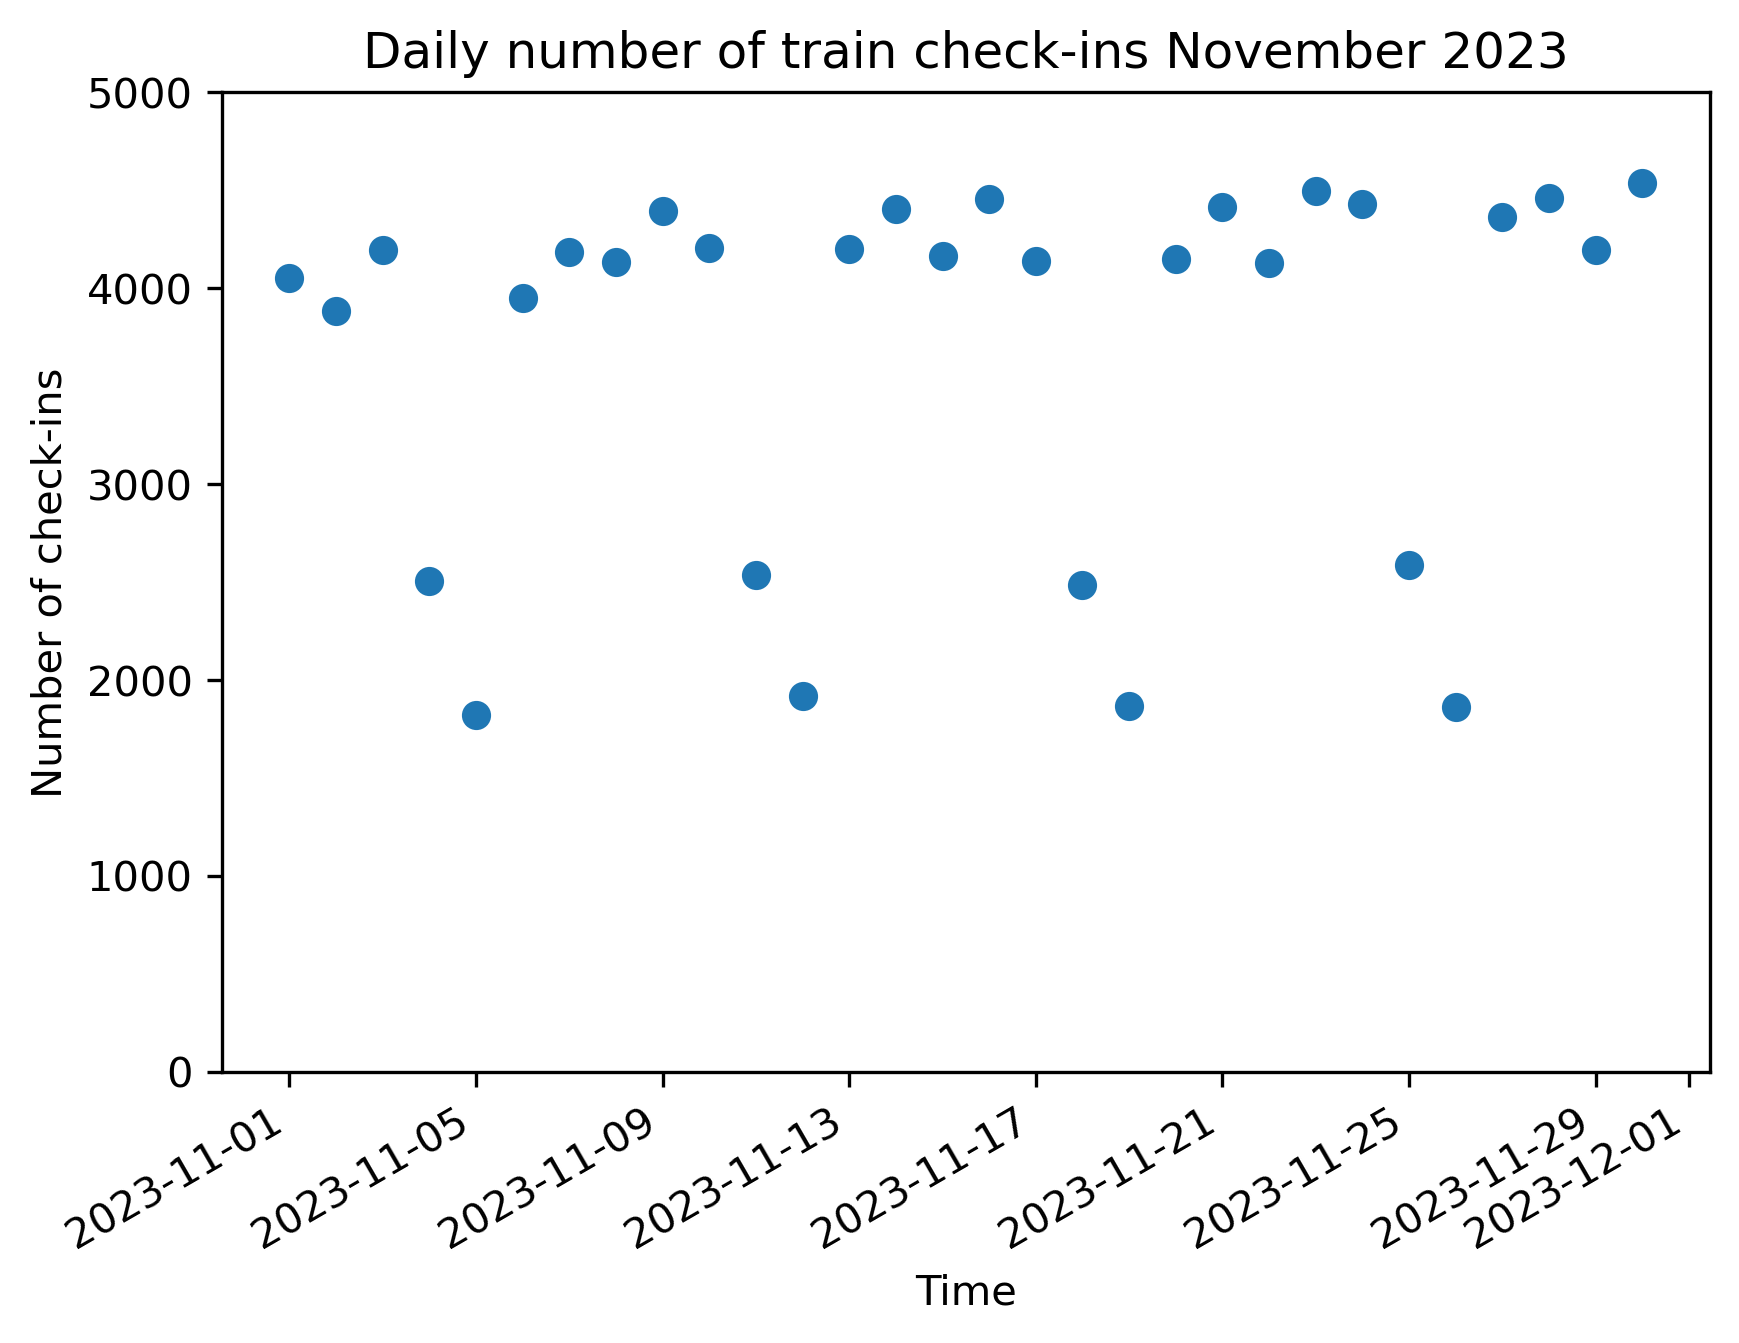

In [28]:
# x = november_df['datetime']
# y = november_df['Aantal_check_ins']

plt.figure(dpi=300)
plt.scatter(x,y)
plt.xlabel('Time')
plt.ylabel('Number of check-ins')
plt.title('Daily number of train check-ins November 2023')
plt.ylim(0,5000)
plt.gcf().autofmt_xdate()  # rotates labels
